# MNIST Handwritten digits classifier

This example is to practice learning from the fast.ai course "Practical deep learning for coders".


In [2]:
!curl -s https://course.fast.ai/setup/colab | bash
!pip install "torch==1.4" "torchvision==0.5.0"

Updating fastai...
Done.
     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 33.3MB/s 
  Found existing installation: torch 1.5.1+cu101
    Uninstalling torch-1.5.1+cu101:
      Successfully uninstalled torch-1.5.1+cu101
  Found existing installation: torchvision 0.6.1+cu101
    Uninstalling torchvision-0.6.1+cu101:
      Successfully uninstalled torchvision-0.6.1+cu101


The above step installs fast.ai and a (less then recent version of) pytorch. This downgrade is required to directly use the API examples from the course since there is a deprecation in the API that is enforced in the latest version of the library and the course code examples have not been edited to cater to that. 

Now let's setup some python notebook behaviour defaults:

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate

In [4]:
path = untar_data(URLs.MNIST, dest='./data')
path

PosixPath('data/mnist_png')

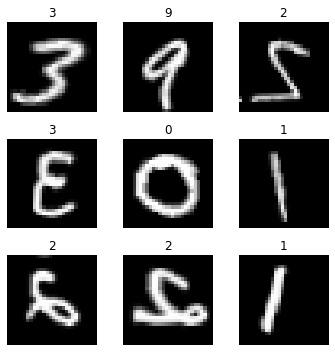

In [5]:
data = ImageDataBunch.from_folder(path, valid_pct=0.3, ds_tfms=get_transforms(), bs=64)
data.show_batch(rows=3, figsize=(5,5))

In [6]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth


In [7]:
learn.fit_one_cycle(5, 0.01)

epoch,train_loss,valid_loss,accuracy,time
0,0.374115,0.227072,0.933238,01:18
1,0.257806,0.132439,0.957667,01:14
2,0.169013,0.149072,0.952286,01:15
3,0.116040,0.066249,0.978714,01:14
4,0.102128,0.059759,0.980857,01:14


In [8]:
accuracy(*learn.get_preds())

tensor(0.9809)

In [9]:
learn.save('stage-1')

In [10]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

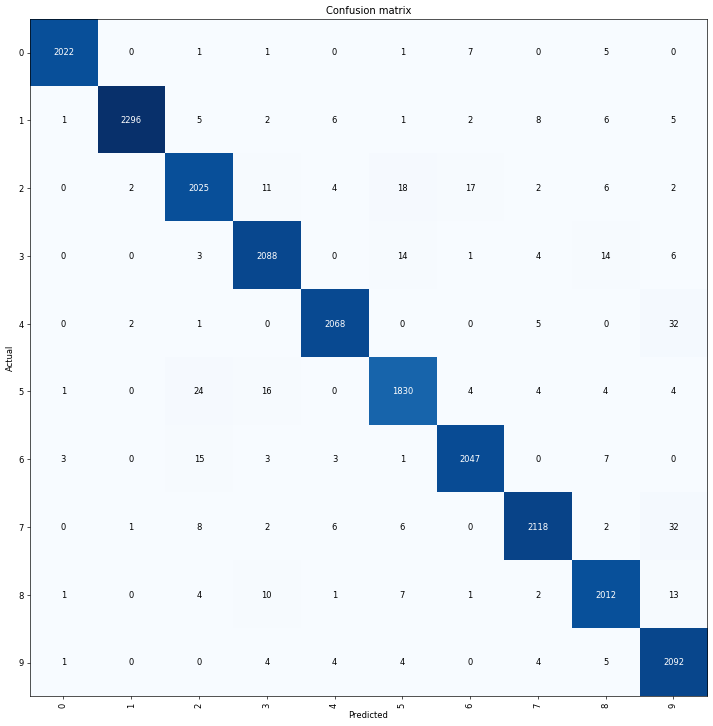

In [11]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [12]:
interp.most_confused(min_val=2)

[('4', '9', 32),
 ('7', '9', 32),
 ('5', '2', 24),
 ('2', '5', 18),
 ('2', '6', 17),
 ('5', '3', 16),
 ('6', '2', 15),
 ('3', '5', 14),
 ('3', '8', 14),
 ('8', '9', 13),
 ('2', '3', 11),
 ('8', '3', 10),
 ('1', '7', 8),
 ('7', '2', 8),
 ('0', '6', 7),
 ('6', '8', 7),
 ('8', '5', 7),
 ('1', '4', 6),
 ('1', '8', 6),
 ('2', '8', 6),
 ('3', '9', 6),
 ('7', '4', 6),
 ('7', '5', 6),
 ('0', '8', 5),
 ('1', '2', 5),
 ('1', '9', 5),
 ('4', '7', 5),
 ('9', '8', 5),
 ('2', '4', 4),
 ('3', '7', 4),
 ('5', '6', 4),
 ('5', '7', 4),
 ('5', '8', 4),
 ('5', '9', 4),
 ('8', '2', 4),
 ('9', '3', 4),
 ('9', '4', 4),
 ('9', '5', 4),
 ('9', '7', 4),
 ('3', '2', 3),
 ('6', '0', 3),
 ('6', '3', 3),
 ('6', '4', 3),
 ('1', '3', 2),
 ('1', '6', 2),
 ('2', '1', 2),
 ('2', '7', 2),
 ('2', '9', 2),
 ('4', '1', 2),
 ('7', '3', 2),
 ('7', '8', 2),
 ('8', '7', 2)]